In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('data\data_wasting_smote.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Wasting_Normal,Wasting_Risiko Kegemukan,Wasting_Sangat Kurus,Wasting_Kurus
0,0,0.791667,0.890909,0.759259,False,True,False,False
1,0,0.833333,0.638182,0.462963,False,False,False,True
2,0,0.416667,0.661818,0.574074,False,True,False,False
3,1,0.083333,0.140000,0.450617,False,True,False,False
4,1,0.208333,0.250909,0.611111,False,True,False,False


In [23]:
x = df.drop(['Wasting_Normal', 'Wasting_Risiko Kegemukan', 'Wasting_Sangat Kurus', 'Wasting_Kurus'], axis =1)
y = df[['Wasting_Normal', 'Wasting_Risiko Kegemukan', 'Wasting_Sangat Kurus', 'Wasting_Kurus']]


X_train_wt, X_test_wt, y_train_wt, y_test_wt = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print ("Jumlah data latih Wasting:", len(y_train_wt))
print ("Jumlah data uji Wasting:", len(y_test_wt))


Jumlah data latih Wasting: 124307
Jumlah data uji Wasting: 31077


In [24]:
np.save('data/data_uji/X_test_wt.npy', X_test_wt)
np.save('data/data_uji/y_test_wt.npy', y_test_wt)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_wasting = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_wt.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  
])

model_wasting.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

model_wasting.summary()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,156 (35.77 KB)

 Trainable params: 9,156 (35.77 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import Callback
class StopAtAccuracy(Callback):
    def __init__(self, target=0.9):
        super(StopAtAccuracy, self).__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')  
        if accuracy is not None:
            if accuracy >= self.target:
                print(f"\nAkurasi sudah mencapai {accuracy:.4f}, training dihentikan.")
                self.model.stop_training = True

stop_callback = StopAtAccuracy(target=0.95)

history_wasting = model_wasting.fit(
    X_train_wt, y_train_wt,
    epochs=50,
    validation_split=0.2,
    callbacks=[stop_callback]
)


Epoch 1/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7291 - loss: 0.6228 - val_accuracy: 0.9500 - val_loss: 0.1458
Epoch 2/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9237 - loss: 0.1951 - val_accuracy: 0.9537 - val_loss: 0.1137
Epoch 3/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9384 - loss: 0.1517 - val_accuracy: 0.9760 - val_loss: 0.0738
Epoch 4/50
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9477 - loss: 0.1292 - val_accuracy: 0.9674 - val_loss: 0.0827
Epoch 5/50
3100/3108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1267
Akurasi sudah mencapai 0.9509, training dihentikan.
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9490 - loss: 0.1267 - val_accuracy: 0.9708 - val_loss: 0.0731


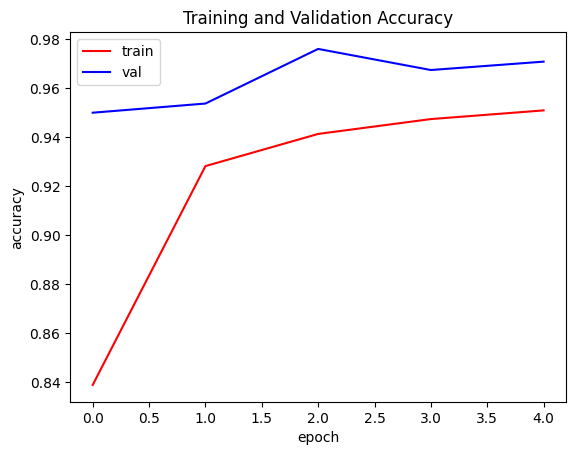

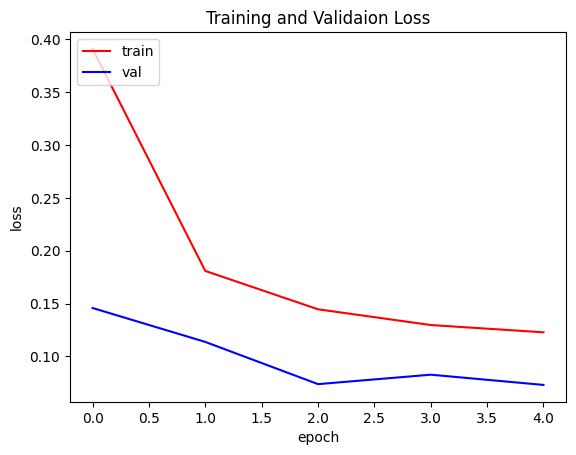

In [27]:
import matplotlib.pyplot as plt

acc = history_wasting.history['accuracy']
val_acc = history_wasting.history['val_accuracy']
loss = history_wasting.history['loss']
val_loss = history_wasting.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

### Konversi Model

In [28]:
# menyimpan model h5 version
model_wasting.save('Model_Wasting/model_wasting.keras')

In [29]:
import tensorflow as tf
import tensorflow as tf

# Load model dari file .h5
model = tf.keras.models.load_model("Model_Wasting/model_wasting.keras")

# Compile ulang model jika ingin menghindari warning
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Simpan ke format SavedModel (Keras 3+ cara baru)
model.export("Model_Wasting")


INFO:tensorflow:Assets written to: Model_Wasting\assets


INFO:tensorflow:Assets written to: Model_Wasting\assets


Saved artifact at 'Model_Wasting'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2734639426320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2734639418832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2734632546192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2734632545040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2734632542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2734632540048: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [30]:
import tensorflow as tf

# Path ke direktori SavedModel
saved_model_dir = "Model_Wasting"

# Buat converter dari SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# (Opsional) Jika ingin optimasi ukuran
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi model
tflite_model = converter.convert()

# Simpan model ke file .tflite
with open("my_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi dan disimpan sebagai 'my_model.tflite'")


Model berhasil dikonversi dan disimpan sebagai 'my_model.tflite'
